In [1]:
from matplotlib import pyplot as plt 

In [2]:
import json

In [3]:
import re

In [4]:
import numpy as np

In [5]:
def bucket(x, size):
    l = len(x)
    buckets = []
    i = 0
    while i < l:
        buckets.append(sum(x[i:i+size])/len(x[i:i+size]))
        i+=size
    return buckets

In [6]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [41]:
class LogReader():
    def __init__(self, filename, keys):
        self.file = open(f'{filename}')
        self.rgx = re.compile(f'^({"|".join(keys)}).*')
        self.matches = {}
        for key in keys:
            self.matches[key]=[]
    
    def grab(self):
        line = next(self.file, None)
        while line:
            match = self.rgx.match(line)
            if match:
                self.matches[match.group(1)].append(float(line.strip().split(' ')[-1]))
            line = next(self.file, None)
        return self.matches

In [42]:
keys = [
    'Batch',
    'train zero one loss',
    'train value loss',
    'train prediction loss',
    'validation zero one loss',
    'validation value loss',
    'validation prediction loss',
]

#### Bucket Size

In [43]:
bucket_size = 10

In [44]:
readers = {}
matches = {}

#### Timestamp of run

In [78]:
files = [
    'logs/train_earl_20211026-1235.log'
]

In [79]:
for file in files:
    if file not in readers:
        readers[file] = LogReader(file, keys)
        matches = readers[file].grab()

## Get matching log lines

In [80]:
file = files[0]

In [102]:
matches = readers[file].grab()

## Current Epoch

In [103]:
batch = matches['Batch'][-1]
batch

1269.0

## Training loss

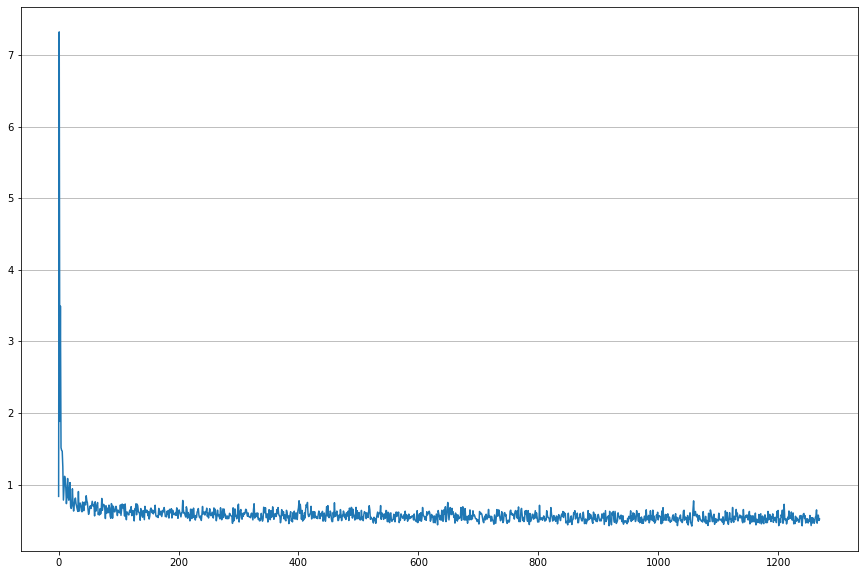

In [104]:
training_loss = matches['train prediction loss']
plt.figure(figsize=(15,10))
plt.grid(axis='y')
plt.plot(training_loss)

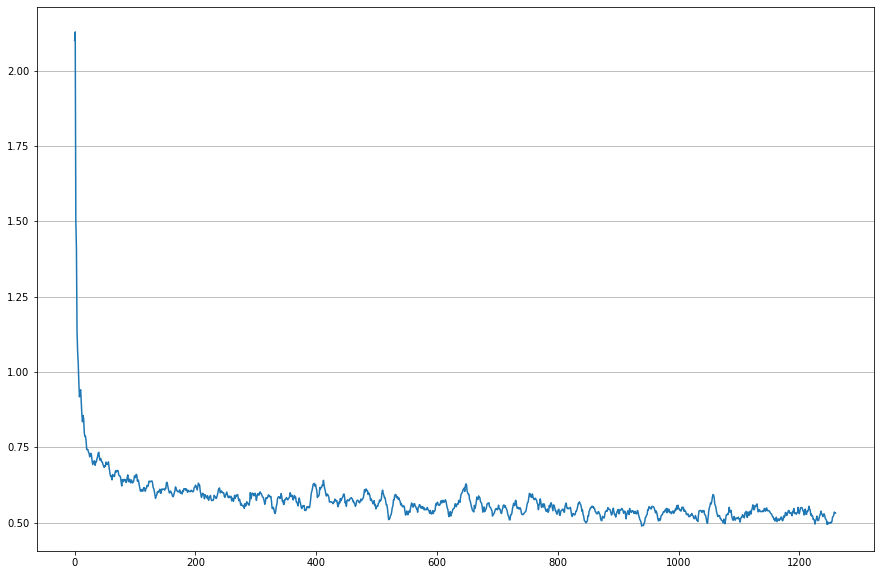

In [105]:
training_loss = matches['train prediction loss']
plt.figure(figsize=(15,10))
plt.grid(axis='y')
plt.plot(moving_average(training_loss,10))

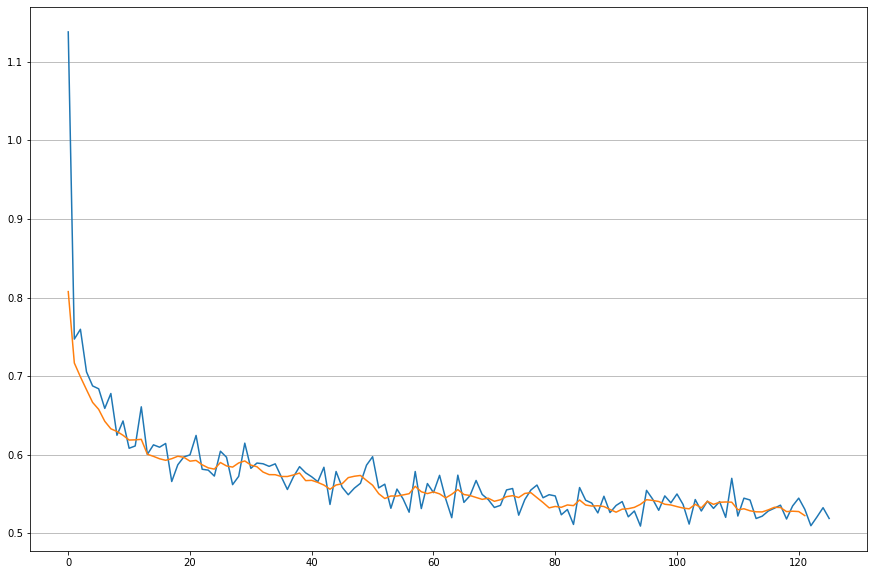

In [108]:
validation_loss = matches['validation prediction loss']
plt.figure(figsize=(15,10))
plt.grid(axis='y')
plt.plot(validation_loss)
plt.plot(moving_average(validation_loss,5))

## Sample predictions

In [106]:
prediction_file = open('logs/train_earl_prediction_sample_20211026-1235.log')

In [107]:
for line in prediction_file:
    print(line.strip())

batch 1310 0      pred,y:   0.546 0.562
batch 1310 1      pred,y:   0.398 0.224
batch 1310 2      pred,y:   0.712 0.562
batch 1310 3      pred,y:   0.000 0.000
batch 1310 4      pred,y:   0.000 0.224
batch 1310 5      pred,y:   0.000 0.562
batch 1310 6      pred,y:   0.175 0.000
batch 1310 7      pred,y:   0.000 0.000
batch 1310 8      pred,y:   1.175 6.094
batch 1310 9      pred,y:   0.331 0.000
batch 1310 10     pred,y:   1.596 0.407
batch 1310 11     pred,y:   0.769 0.407
batch 1310 12     pred,y:   2.285 2.425
batch 1310 13     pred,y:   0.839 0.696
batch 1310 14     pred,y:   0.628 1.102
batch 1310 15     pred,y:   1.171 1.562
batch 1310 16     pred,y:   0.753 0.814
batch 1310 17     pred,y:   0.827 0.696
batch 1310 18     pred,y:   0.755 0.000
batch 1310 19     pred,y:   0.000 0.000
batch 1310 20     pred,y:   0.540 0.224
batch 1310 21     pred,y:   0.000 0.000
batch 1310 22     pred,y:   0.635 0.224
batch 1310 23     pred,y:   0.926 0.224
batch 1310 24     pred,y:   0.000 0.224
